# KE transfer between eddy and LS mean shearflow

### The goal is to compute its strength relative to buoyancy-w correlation in the volumetric KE budget of a convecting cyclone in shear. This copies some derivations from a [Mapes-Cheedela cumulus friction paper](https://www.overleaf.com/project/5e4d6f1262f6f40001fdda9d)

### Derivation: downshear/upshear flux as a KE sink/source

The horizontal momentum budget, averaged over some horizontal filter scale (denoted by an overbar $\overline{\psi}$) has a vertical eddy momentum flux convergence term (VEMC, listed first here), among its other tendency terms such as large scale advection (ADV), the pressure gradient force (PGF), and horizontal eddy flux convergence (HEMC): 

$$
\frac {\partial }{\partial t}(\overline{\vec{V}}) = VEMC + ADV + PGF + HEMC + ...
$$

For clarity and coding ease, Here we take $\rho_0(z)$ to be a constant reference profile, and use hydrostatic pressure (simply denoted p) as a vertical coordinate, so $dp = -\rho_0 g dz$ and VEMC can then be written as: 

$$
VEMC = -\frac{1}{\rho_0} \frac{\partial}{\partial z} \overline{(\rho_0 \vec{V}'w')} = g \frac{\partial}{\partial p} (\overline{\rho_0 \vec{V}'w'})
$$


The KE equation for filter-scale wind (here, the domain-averaged shearflow) is obtained by dot product with $\vec V$. In the Schechter simulations, the domain-mean shear is purely zonal $U(p)$, so the equation reduces to scalar form. 

$$
\frac {\partial }{\partial t}(\overline{U}^2/2) = VEMC \cdot \overline{U}(p) + ...
$$

Since KE is easily redistributed vertically by pressure, we want to study the more stable mass-averaged quantity $<KE> \equiv 1/p_s \int_{0}^{p_s}(KE) dp = 1/p_s \int_{0}^{\inf}(KE) \rho g dz$. The budget contribution to shearflow KE by VEMC is: 

$$\frac {\partial }{\partial t}<(\overline{U}^2/2)> = <(VEMC) \overline U> + ...$$

$$= <g \frac{\partial}{\partial p} (\overline{\rho_0 u'w'}) \cdot \overline{U}> + ...$$

**Force dotted into velocity** is the interpretation of the above <SKE> source term in the mass average <>. 

Integrating a vertical derivative (convergence) vanishes except for a boundary value (surface stress $\tau_{s}$), so the RHS term can be rewritten as: 

$$
= <\frac{\partial \overline{U}}{\partial p} \cdot (g \rho_0 \overline{u'w'})> + \tau_{s} \overline{U}(p_s) + ...
$$

**Downgradient flux** is the interpretation of the above <SKE> source term, with surface drag as a sink. 

This has all been written in terms of the budget of domain-mean shearflow <SKE>. But since total KE = mean + eddy, because $\overline{  \overline U \cdot u' } = 0$, eddy vertical momentum transport is a *conversion* process between mean-flow KE and EKE. If our interest is the eddy (a cyclone plus its fine structure), a simple sign flip from the <SKE> term is implied. Now how to separate the "cyclone" from its "fine structure" awaits definition. 


Meanwhile, the buoyancy force generates total-flow KE at the rate $<\overline{b'w'}> = <\overline{bw}>$ since $\overline w = 0$ in these periodic-domain simulations. All this buoyancy driving of KE goes into EKE, not into the mean shearflow. We wish to compare these two <EKE> terms, especially isolating the cyclone scale flow. 

$W kg^{-1}$ is the unit of these vertically <EKE> rates of change, averaged (not integrated) over the column mass. Let's plot the profiles vs. pressure, and let the vertical integral speak for itself by eyeball. 


In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
!ls /Users/bmapes/Box/Schechter_cyclone_shear_formapes/anl

cm1out_000083.nc cm1out_000098.nc


In [4]:
ds = xr.open_dataset('/Users/bmapes/Box/Schechter_cyclone_shear_formapes/anl/cm1out_000083.nc')
ds

<xarray.Dataset> Size: 1GB
Dimensions:   (one: 1, time: 1, ni: 444, nip1: 445, nj: 444, njp1: 445, nk: 40,
               nkp1: 41)
Coordinates:
  * time      (time) timedelta64[ns] 8B 4 days 07:00:00
Dimensions without coordinates: one, ni, nip1, nj, njp1, nk, nkp1
Data variables: (12/93)
    f_cor     (one) float32 4B ...
    ztop      (one) float32 4B ...
    xh        (ni) float32 2kB ...
    xf        (nip1) float32 2kB ...
    yh        (nj) float32 2kB ...
    yf        (njp1) float32 2kB ...
    ...        ...
    khh       (time, nkp1, nj, ni) float32 32MB ...
    khv       (time, nkp1, nj, ni) float32 32MB ...
    dissten   (time, nkp1, nj, ni) float32 32MB ...
    nm        (time, nkp1, nj, ni) float32 32MB ...
    defv      (time, nkp1, nj, ni) float32 32MB ...
    defh      (time, nkp1, nj, ni) float32 32MB ...
Attributes: (12/69)
    cm1 version:  cm1r19.1
    x_units:      km
    x_label:      x
    y_units:      km
    y_label:      y
    z_units:      km
    ...           ...
    cgt1:         1.8916739
    cgt2:         -1.2868382
    cgt3:         0.3951643
    dgt1:         2.042509
    dgt2:         -3.0983832
    dgt3:         1.0558741

Text(0.5, 1.0, 'sqrt(mesh areas) in km ')

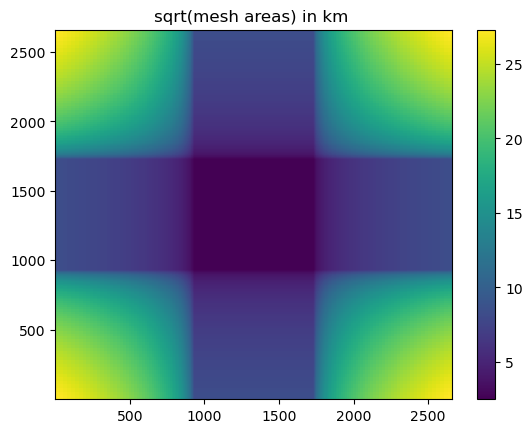

In [105]:
# Mesh size quick look 
Aw = (ds.xh.differentiate(coord='ni')   * ds.yh.differentiate(coord='nj'))
plt.pcolormesh(ds.xh, ds.yh, np.sqrt(Aw)); plt.colorbar(); plt.title('sqrt(mesh areas) in km ')

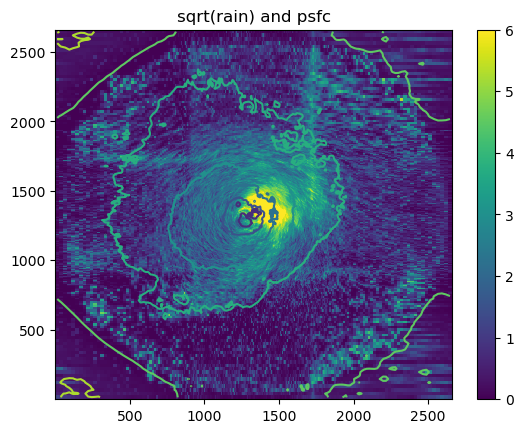

In [469]:
# Quick look at sqrt(rainfall) and surface pressure 
plt.pcolormesh(ds.xh, ds.yh, np.sqrt(ds.rain[0]),vmax=6 ); plt.colorbar()
plt.contour(ds.xh, ds.yh, ds.psfc[0]);
plt.title('sqrt(rain) and psfc');

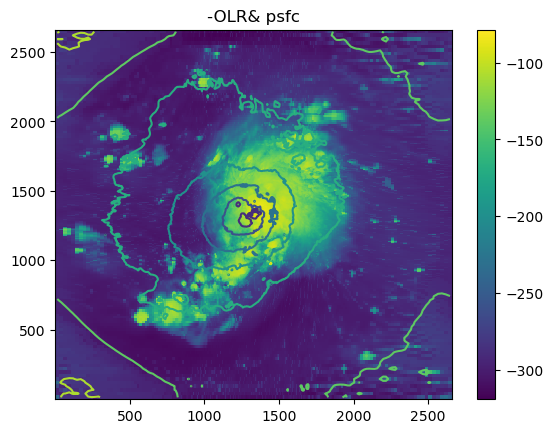

In [497]:
# Quick look at OLR and surface pressure (instantaneous; rain is accumulated)
plt.pcolormesh(ds.xh, ds.yh, -ds.olr[0])
plt.colorbar()

plt.contour(ds.xh, ds.yh, ds.psfc[0]);
plt.title('-OLR& psfc');
#lt.contour(ds.xh, ds.yh, np.sqrt(ds.rain[0]));

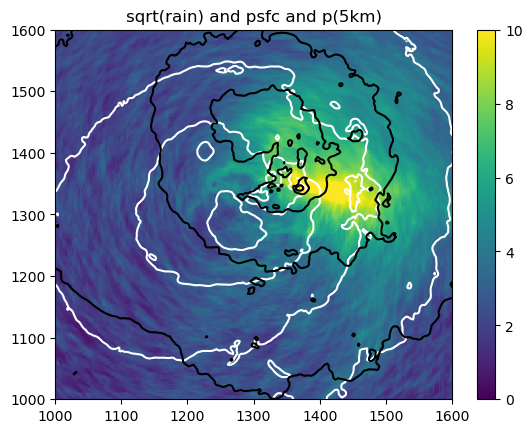

In [491]:
# zoom in and plot midlevel p contours too 

plt.pcolormesh(ds.xh, ds.yh, np.sqrt(ds.rain[0]),vmax=10 ); plt.colorbar()
plt.contour(ds.xh, ds.yh, ds.psfc[0], colors='w');
plt.contour(ds.xh, ds.yh, ds.prs[0][15], colors='k');
plt.title('sqrt(rain) and psfc and p(5km)');
plt.ylim([1000,1600]); plt.xlim([1000,1600]);

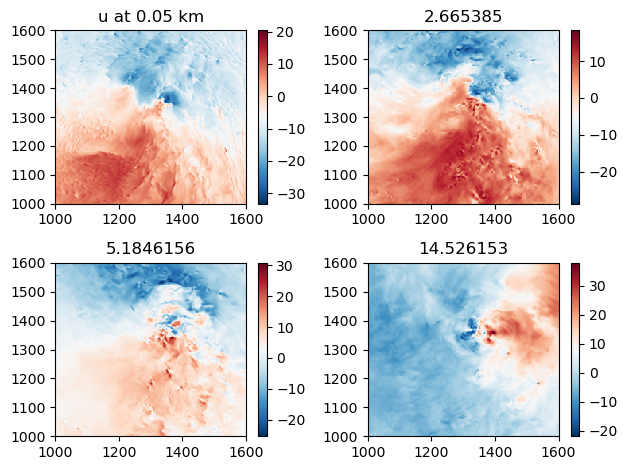

In [481]:
# Inner area closer look: u field. Mainly circulatory at low levels, but divergent at the top! 

plt.subplot(221)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][0], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]); 
plt.title('u at '+ str(ds.z[0].values)+' km' )

plt.subplot(222)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][10], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[10].values) )

plt.subplot(223)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][15], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[15].values) )

plt.subplot(224)
plt.pcolormesh(ds.xf, ds.yh, ds.u[0][27], cmap='RdBu_r'); plt.colorbar();
plt.xlim([1000,1600]); plt.ylim([1000,1600]);
plt.title( str(ds.z[27].values) )

plt.tight_layout()

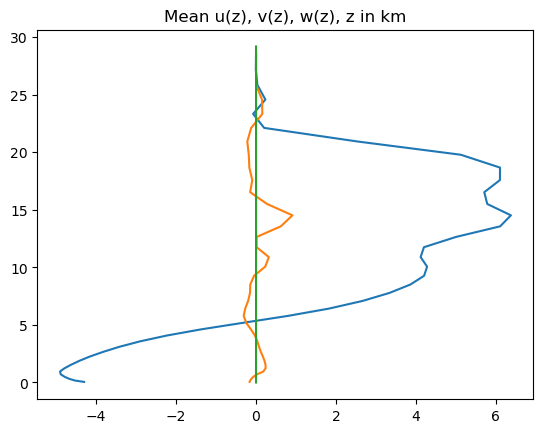

In [288]:
# Area-weighted mean wind profiles

# Define area-weighting factors for u and v. "h" indicates normal i,j,k while 'f' is for ip1 and jp1 and kp1
Au = (ds.xf.differentiate(coord='nip1') * ds.yh.differentiate(coord='nj'))
Av = (ds.xh.differentiate(coord='ni')   * ds.yf.differentiate(coord='njp1'))
Aw = (ds.xh.differentiate(coord='ni')   * ds.yh.differentiate(coord='nj'))

# Make a p coordinate for plots 
ds['p'] = (Aw * ds.prs[0]).mean(dim=['nj','ni']) / Aw.mean()
ds['pf'] = ds['p'].interp(nk=ds['nkp1'])

Uprof = (Au * ds.u[0]).mean(dim=['nj','nip1']) / Au.mean()
Vprof = (Av * ds.v[0]).mean(dim=['njp1','ni']) / Av.mean()
Wprof = (Aw * ds.w[0]).mean(dim=['nj','ni']) / Aw.mean()
Pprof = (Aw * ds.w[0]).mean(dim=['nj','ni']) / Aw.mean()

plt.plot(Uprof, ds.z); plt.title('Mean u(z), v(z), w(z), z in km')
plt.plot(Vprof, ds.z); 
plt.plot(Wprof, ds.zf); 

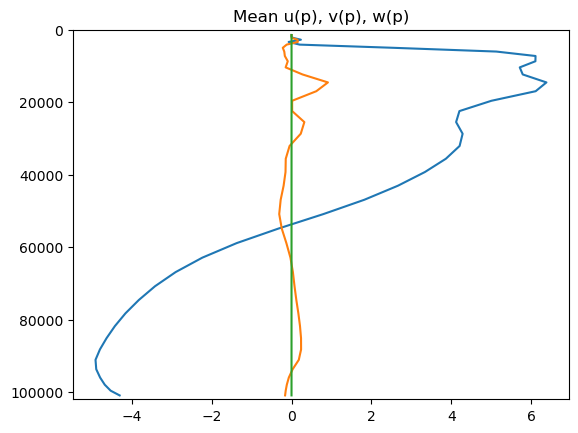

In [243]:
plt.plot(Uprof, ds.p); plt.title('Mean u(p), v(p), w(p)')
plt.plot(Vprof, ds.p); 
plt.plot(Wprof, ds.pf); 
plt.ylim([102000,0]);

In [498]:
# Subtract area-mean u profile to get 'up' variable. 
# Not important since [w']=0 but harmless clarity.

ds['up'] = ds['u']-Uprof

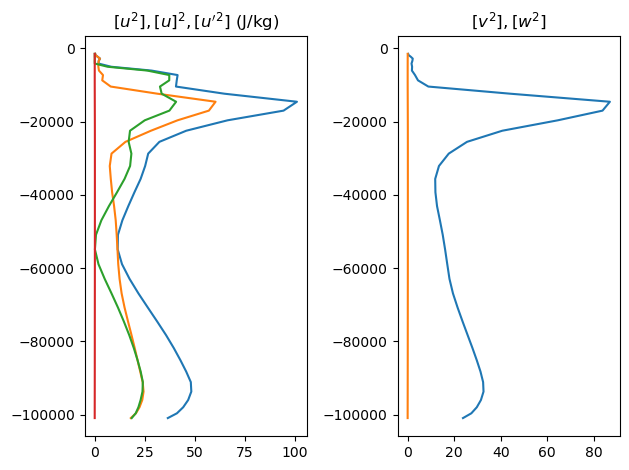

In [499]:
# Area weighted variance (2*KE) profiles 

U2prof = (Au * ds.u[0]* ds.u[0]).mean(dim=['nj','nip1']) / Au.mean()
Up2prof= (Au * ds.up[0]*ds.up[0]).mean(dim=['nj','nip1']) / Au.mean()
V2prof = (Av * ds.v[0]* ds.v[0]).mean(dim=['njp1','ni']) / Av.mean()
W2prof = (Aw * ds.w[0]* ds.w[0]).mean(dim=['nj','ni']) / Aw.mean()

plt.subplot(121)
plt.plot(U2prof, -ds.p); plt.title("$[u^2], [u]^2, [u'^2]$ (J/kg)")
plt.plot(Up2prof, -ds.p); 
plt.plot(Uprof*Uprof, -ds.p); 
plt.plot(W2prof, -ds.pf); 

plt.subplot(122)
plt.plot(V2prof, -ds.p); plt.title('$[v^2], [w^2]$')
plt.plot(W2prof, -ds.pf); 
plt.tight_layout();

#### Is it just a coincidence that $\overline u^2 = \overline{u'^2}$ at low levels??

# Kinetic energy budget terms 

1. buoyancy term <bw>, density weighted  
2. momentum flux term SKEdot = $< -(\overline{u'\omega'})_p \cdot \overline{U}>$

In [290]:
# First, w'b', how big is it?

# GET DENSITY 
ds['thv'] = ds.th * (1 + 0.608*ds.qv)
ds['rho'] = ds.prs / (ds.th * (1 + 0.608*ds.qv)) / 287.   # rho = p/RT

# VPGF differs from g? No! So hydrostatic, or maybe prs was gotten hydrostatically
# ds['VPGF'] = ds.prs.differentiate('nk') / ds.zh.differentiate('nk') / rho  

# GET BUOYANCY
Rhoprof = (Aw * ds.rho[0]).mean(dim=['nj','ni']) / Aw.mean()
ds['b'] = -9.8 * (ds.rho - Rhoprof)/Rhoprof

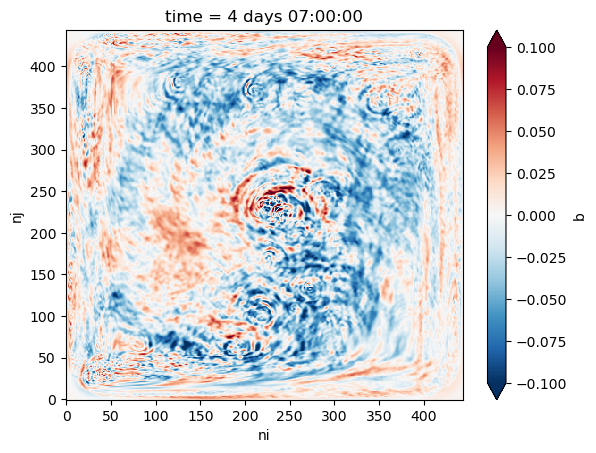

In [293]:
# stratospheric wave junk, tropospheric convection and warm core
ds.b[0][38].plot(vmin=-0.1, vmax=0.1, cmap='RdBu_r');

# Quantifying KE budget terms: first, $\rho b'w'$ 

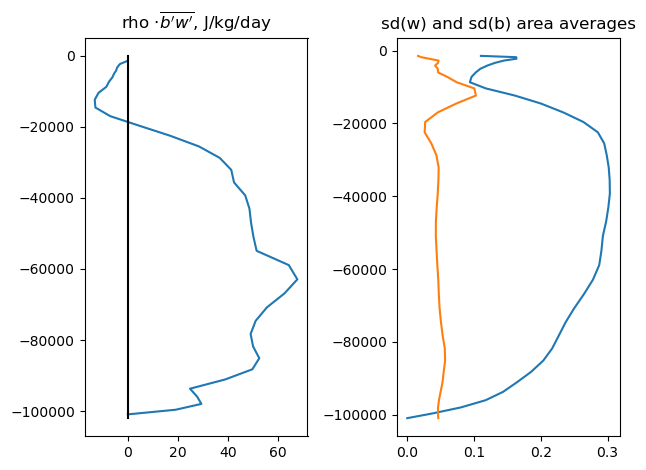

In [502]:
# MULTIPLY bw (W/kg), Interpolating b to w levels, and take horizontal mean 

ds['bw'] = ds['w'] * ds['b'].interp(nk=ds['nkp1'])
ds['rhobw'] = ds['bw'] * ds['rho'].interp(nk=ds['nkp1'])

RBWprof= (Aw * ds.rhobw[0])     .mean(dim=['nj','ni']) / Aw.mean()
B2prof = (Aw * ds.b[0] *ds.b[0]).mean(dim=['nj','ni']) / Aw.mean()

plt.subplot(121) 
plt.plot(RBWprof *86400, -ds.pf); plt.title("rho $\cdot \overline{b'w'}$, J/kg/day")
plt.plot([0,0],[-102000,0],'k')

plt.subplot(122)
plt.plot(np.sqrt(W2prof), -ds.pf); plt.title('sd(w) and sd(b) area averages')
plt.plot(np.sqrt(B2prof), -ds.p); 

plt.tight_layout()

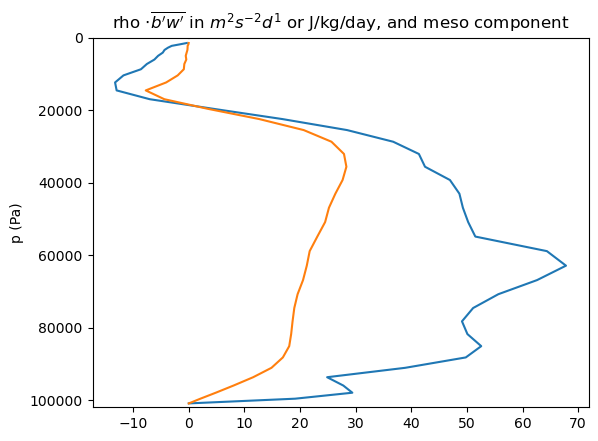

In [559]:
# Hor. smoothing on b and/or w to isolate **cyclone-scale eddy** energy generation 

from scipy.ndimage import gaussian_filter as smoo 
smooscale = 10

# Stagger b to w levels 
bstag =  ds['b']  [0].interp(nk=ds['nkp1'])
rhostag =ds['rho'][0].interp(nk=ds['nkp1'])

# Same profile size as unsmoothed RBW = rh * b * w 
RBWSprof = RBWprof*0.

# Loop over levels, smoothing and making the product term 
for ilev,kkk in enumerate(ds.nk.values):
    #print(ilev)
    RBWS = smoo( ds['w'][0][ilev],smooscale ) * smoo( bstag[ilev],smooscale ) * rhostag[ilev]
    RBWSprof[ilev] = (Aw * RBWS).mean(dim=['nj','ni']) / Aw.mean()

plt.plot(RBWprof  *86400, ds.pf); 
plt.title("rho $\cdot \overline{b'w'}$ in $m^2s^{-2} d^1$ or J/kg/day, and meso component")
plt.plot(RBWSprof *86400, ds.pf)
plt.ylim([102000,0]); plt.ylabel('p (Pa)')
plt.plot([0,0],[-102000,0],'k');

## Vertical mean value of [bw] term is about 16 J/kg/d, or $(4m/s)^2$ /d


# Now the momentum flux term:

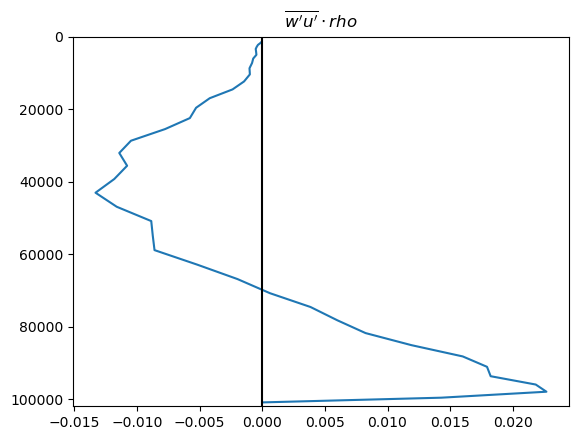

In [571]:
# TERM 2. u'w' as a SKEdot term 
# Interpolate upert to w grid and multiply

ds['wu']    = ds.w * ds['up'].interp(nk=ds['nkp1'], nip1=ds['ni'])
ds['rhowu'] = ds.wu * Rhoprof.interp(nk=ds['nkp1'])

WUprof =  (Aw * ds.wu[0])   .mean(dim=['nj','ni']) / Aw.mean()
RWUprof = (Aw * ds.rhowu[0]).mean(dim=['nj','ni']) / Aw.mean()

plt.plot(RWUprof, ds.pf); plt.title("$\overline{w'u'} \cdot rho$");
plt.ylim([102000,0])
plt.plot([0,0],[102000,0],'k');

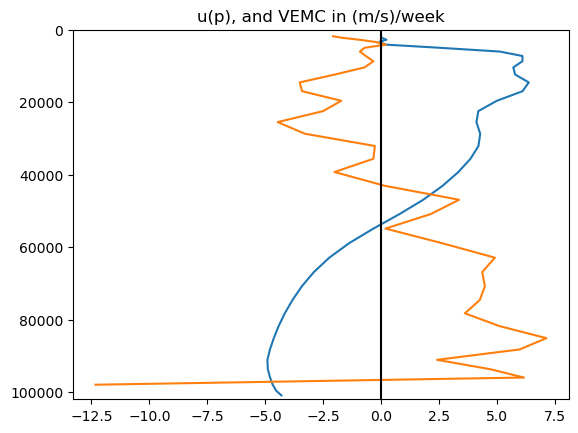

In [578]:
# Convergence of that flux: -1/rho d/dz(RWU) = g d/dp(RWU)
# Surface stress is missing as the lower boundary condition 
# for this explicit momentum flux, so clip lowest levels 

VEMCprof = RWUprof.differentiate(coord='nk')/ds.pf.differentiate(coord='nk') * 9.8  # m/s/s accel

plt.plot(Uprof, ds.p)
plt.plot(VEMCprof[2:] *86400*7, ds.pf[2:]); plt.title("u(p), and VEMC in (m/s)/week");
plt.ylim([102000,0])
#plt.plot(Shearp *10, -ds.p);
plt.plot([0,0],[102000,0],'k');

# SKE extraction rate to EKE: 
# \<SKE> /(1 week) ~ 20J/kg /week ~ 3 J/kg /day
## Compared to mesoscale part of [bw] term, ~16 J/kg /day in troposphere
### about 20% as large as thermally direct EKE source term 

-----------------

# Check it the other way: $ <\frac{\partial \overline{U}}{\partial p} \cdot (g \rho_0 \overline{u'w'})>$

**Downgradient flux** is the interpretation of the above <SKE> source term. 

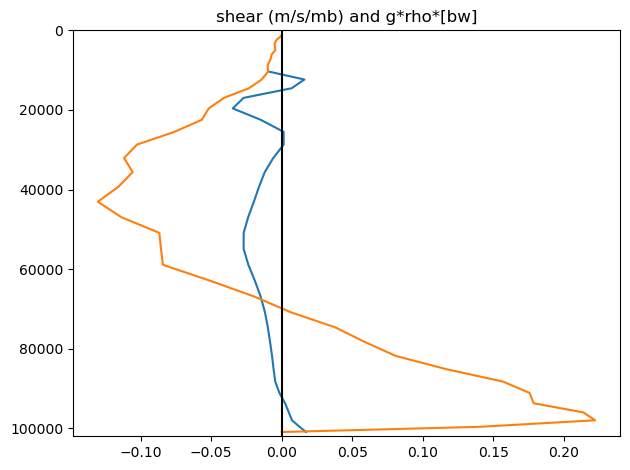

In [600]:
Shearp = Uprof.differentiate(coord='nk')/ds.p.differentiate(coord='nk')  # m/s per Pa

#plt.plot(RWUprof, ds.pf); plt.title("$\overline{w'u'} \cdot rho$ and $\overline{u}_p$");
#plt.plot(Uprof/100, ds.p); plt.title('Mean u(p) (m/s), shear (m/s/ 100mb), and g$rho[bw]$*100')

plt.plot(Shearp[0:30]*100, ds.p[0:30]);
plt.plot(RWUprof*9.8, ds.pf)
plt.title('shear (m/s/mb) and g*rho*[bw]')

plt.ylim([102000,0])
plt.plot([0,0],[102000,0],'k');

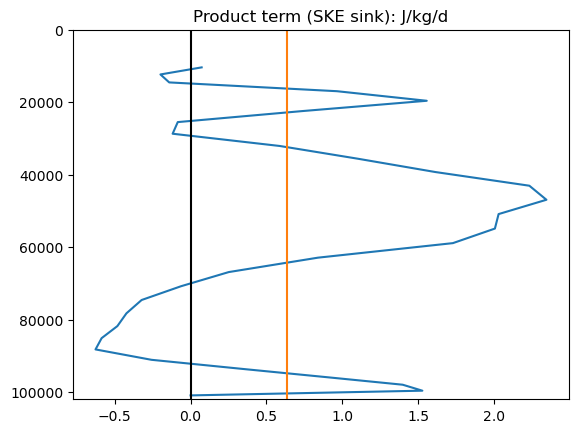

In [618]:
# moment of truth, the product, ignoring k staggering (sprint to the end here)

prod = Shearp.values * 9.8*RWUprof.values[0:40]

plt.plot(prod[0:30] *86400, ds.p[0:30]);
plt.title('Product term (SKE sink): J/kg/d')
plt.ylim([102000,0])
plt.plot([0,0],[102000,0],'k');

plt.plot([0,0]+np.mean(prod[0:30])*86400,[102000,0]);

# Vertical mean is about +0.6 J/kg/day
## compared to about -3 computed the other way
### still a problem someplace in this second derivation!